<a href="https://colab.research.google.com/github/EstevaoXavier/analisando_vendas_pandas/blob/main/analise_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pré Análise**

In [153]:
import pandas as pd

In [154]:
#importando o arquivo
df = pd.read_excel('Vendas.xlsx')

In [155]:
#renomeando as colunas
df=df.rename(columns={'Código Venda':'codigo_venda'})
df=df.rename(columns={'Data':'data'})
df=df.rename(columns={'ID Loja':'id_loja'})
df=df.rename(columns={'Produto':'produto'})
df=df.rename(columns={'Quantidade':'quantidade'})
df=df.rename(columns={'Valor Unitário':'valor_unitario'})
df=df.rename(columns={'Valor Final':'valor_final'})
df


,codigo_venda,data,id_loja,produto,quantidade,valor_unitario,valor_final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
93905,65012,2019-11-30,Shopping Vila Velha,Mochila Xadrez,2,283,566
93906,65013,2019-11-30,Ribeirão Shopping,Pulseira Listrado,2,79,158
93907,65013,2019-11-30,Ribeirão Shopping,Cueca Listrado,3,67,201
93908,65014,2019-11-30,Shopping Morumbi,Pulseira Linho,5,114,570


In [156]:
#separando as colunas em séries
dfcodigo_venda = df['codigo_venda']
dfdata = df['data']
dfloja = df['id_loja']
dfproduto = df['produto']
dfquantidade = df['quantidade']
dfvalor_unitario = df['valor_unitario']
dfvalor_final = df['valor_final']

In [157]:
df.loc[9,'valor_final']

105

In [158]:
dfdata = pd.to_datetime(dfdata, format='%m/%d/%Y')
dfdata

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-02
4       2019-01-02
           ...    
93905   2019-11-30
93906   2019-11-30
93907   2019-11-30
93908   2019-11-30
93909   2019-11-30
Name: data, Length: 93910, dtype: datetime64[ns]

In [159]:
dfvalor_final

0         358
1         360
2         368
3         600
4          71
         ... 
93905     566
93906     158
93907     201
93908     570
93909    1036
Name: valor_final, Length: 93910, dtype: int64

#**Análises**

##As Lojas que mais Vendem

In [160]:
#pegando as 10 lojas que mais vendem
graf_dados = df.groupby('id_loja').count().valor_final.sort_values(ascending=False).head(10)
graf_dados

id_loja
Shopping Vila Velha                 3935
Norte Shopping                      3924
Palladium Shopping Curitiba         3909
Shopping Center Leste Aricanduva    3863
Bourbon Shopping SP                 3830
Rio Mar Shopping Fortaleza          3824
Novo Shopping Ribeirão Preto        3810
Shopping SP Market                  3808
Iguatemi Campinas                   3793
Shopping Ibirapuera                 3778
Name: valor_final, dtype: int64

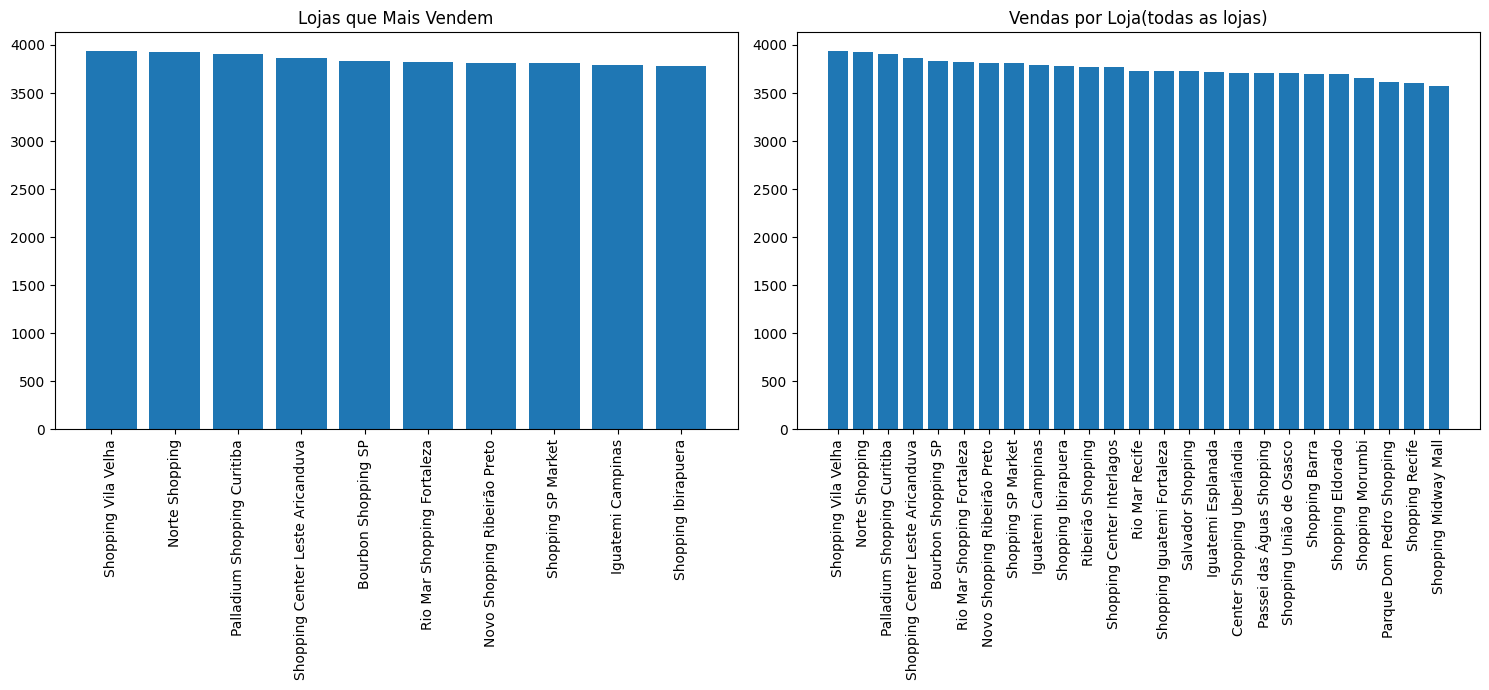

In [161]:
#transformando em gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
graf_dados = df.groupby('id_loja').count().valor_final.sort_values(ascending=False).head(10)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Lojas que Mais Vendem')

plt.subplot(1,2,2)
graf_dados = df.groupby('id_loja').count().valor_final.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Vendas por Loja(todas as lojas)')

plt.tight_layout()

##Lojas com maiores receitas

In [162]:
graf_dados = df[['id_loja', 'valor_final']].groupby('id_loja').sum().valor_final.sort_values(ascending=False).head(10)
graf_dados

id_loja
Shopping Vila Velha                 1615271
Iguatemi Campinas                   1612460
Shopping SP Market                  1610930
Norte Shopping                      1610477
Palladium Shopping Curitiba         1600499
Bourbon Shopping SP                 1600260
Shopping Center Leste Aricanduva    1596714
Iguatemi Esplanada                  1596339
Ribeirão Shopping                   1594186
Rio Mar Recife                      1582897
Name: valor_final, dtype: int64

Text(0.5, 1.0, 'Todas as Lojas')

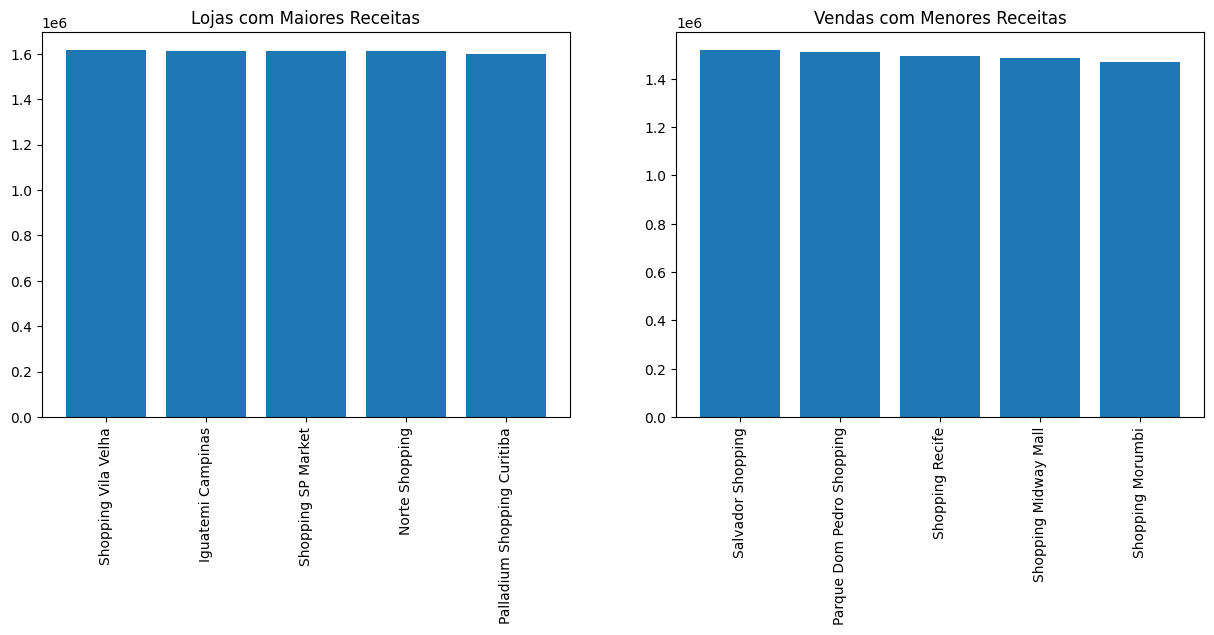

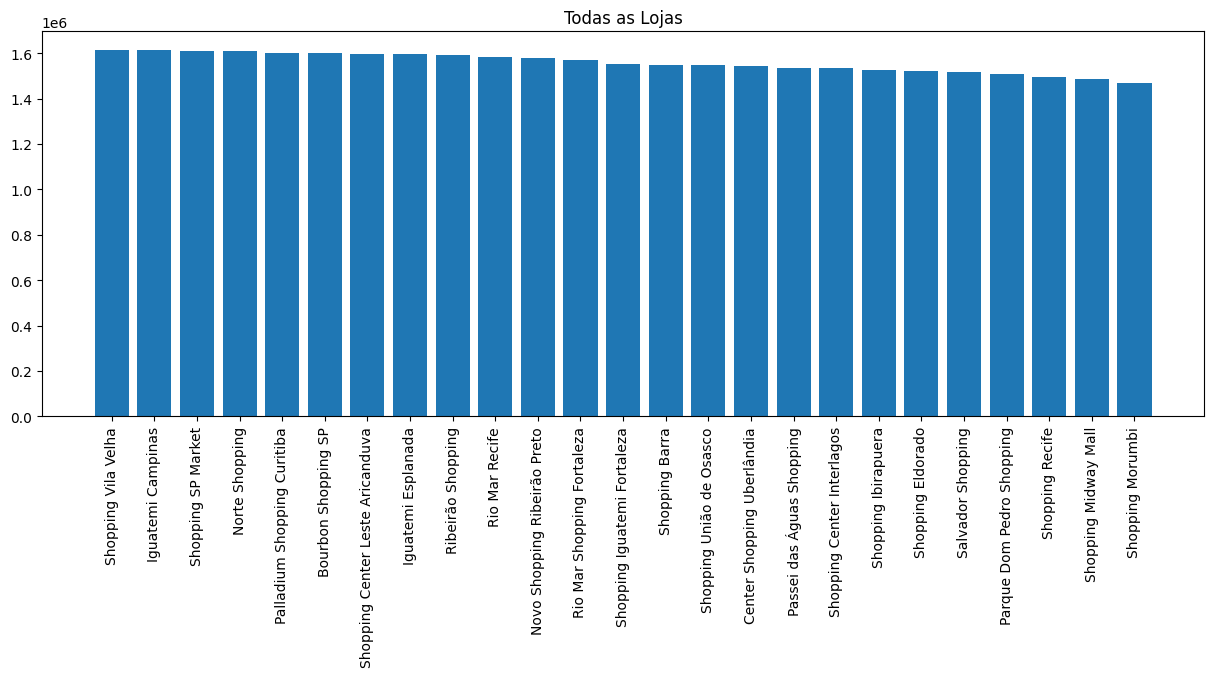

In [163]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
graf_dados = df[['id_loja', 'valor_final']].groupby('id_loja').sum().valor_final.sort_values(ascending=False).head(5)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Lojas com Maiores Receitas')

plt.subplot(1,2,2)
graf_dados = df[['id_loja', 'valor_final']].groupby('id_loja').sum().valor_final.sort_values(ascending=False).tail(5)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Vendas com Menores Receitas')

# plt.tight_layout()

plt.figure(figsize=(15,5))
graf_dados = df[['id_loja', 'valor_final']].groupby('id_loja').sum().valor_final.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Todas as Lojas')

##Produtos que mais vendem

In [164]:
graf_dados = df.groupby('produto').count().valor_final.sort_values(ascending=False).head(10)
graf_dados

produto
Bermuda Linho        857
Mochila Liso         854
Pulseira Liso        851
Relógio Listrado     847
Cueca                840
Calça Xadrez         828
Short Linho          826
Pulseira Listrado    825
Casaco Liso          825
Pulseira Estampa     819
Name: valor_final, dtype: int64

Text(0.5, 1.0, 'Vendas por produtos')

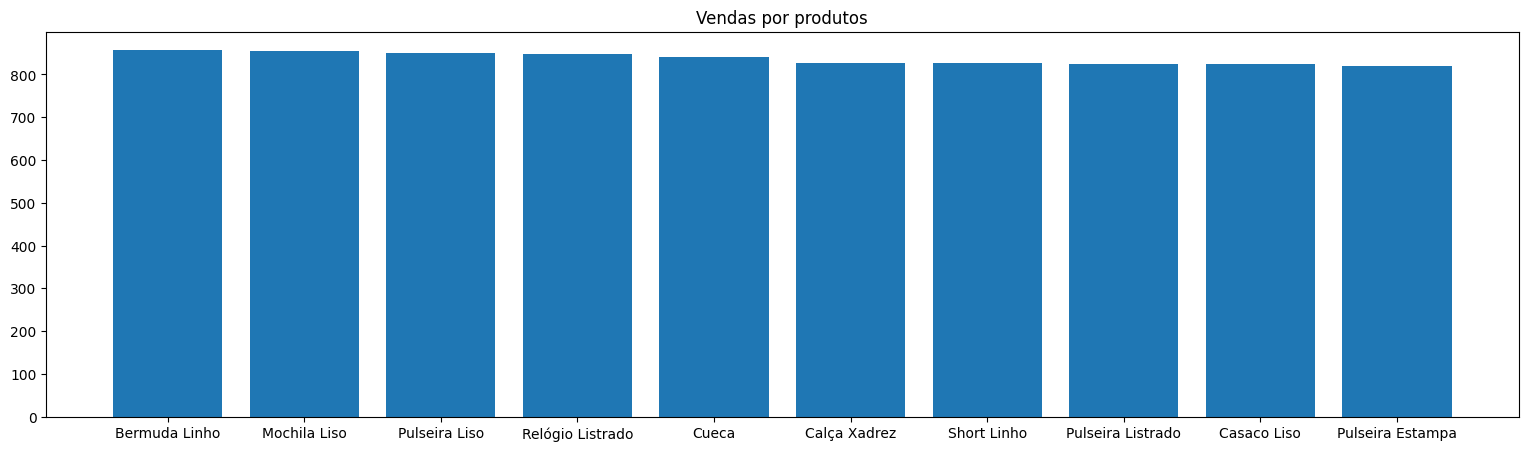

In [165]:
plt.figure(figsize=(19,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produtos')

##Receita por Produto

In [166]:
graf_dados = df[['produto', 'valor_final']].groupby('produto').sum().valor_final.sort_values(ascending=False)
graf_dados

produto
Terno Listrado    1215935
Terno Linho       1203000
Terno Liso        1199520
Terno Xadrez      1169850
Terno Estampa     1135954
                   ...   
Meia Estampa        88400
Meia Xadrez         64944
Meia Liso           62358
Meia Listrado       59496
Meia                51450
Name: valor_final, Length: 120, dtype: int64

Text(0.5, 1.0, 'Produtos com Menores Receitas')

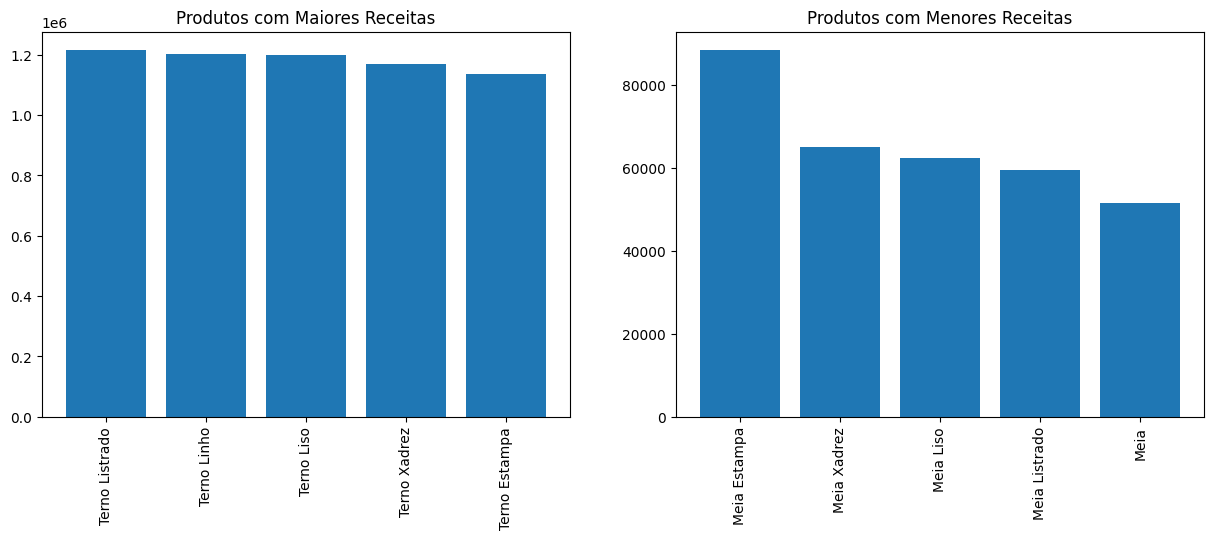

In [167]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
graf_dados = df[['produto', 'valor_final']].groupby('produto').sum().valor_final.sort_values(ascending=False).head(5)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Produtos com Maiores Receitas')

plt.subplot(1,2,2)
graf_dados = df[['produto', 'valor_final']].groupby('produto').sum().valor_final.sort_values(ascending=False).tail(5)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Produtos com Menores Receitas')

# plt.tight_layout()


# **Análise de Tempo**

##Sazonalidade

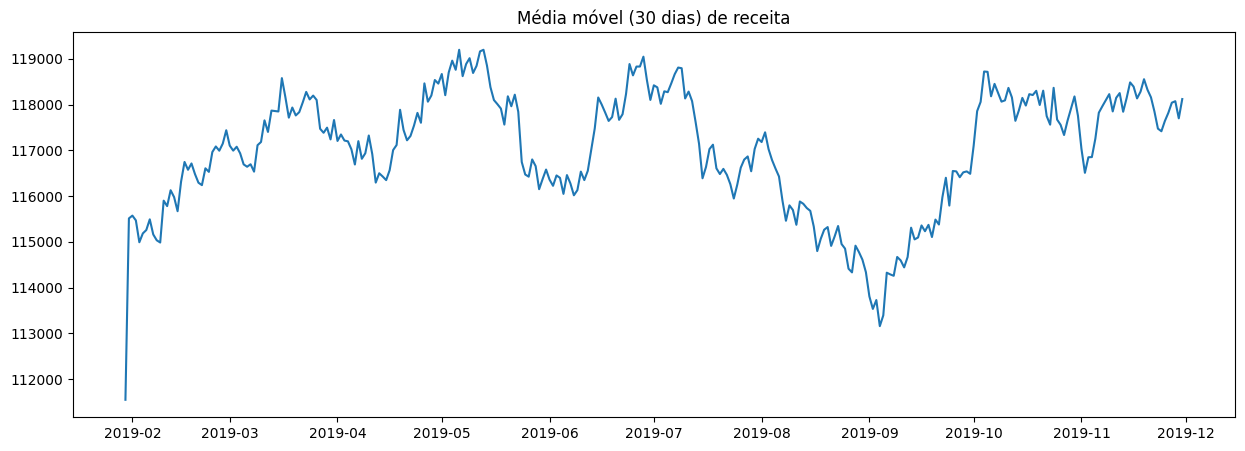

In [168]:
plt.figure(figsize=(15,5))
graf_dados = df[['valor_final','data']].groupby('data').sum().rolling(30).mean()
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Média móvel (30 dias) de receita')
plt.show()

In [169]:
#criando uma nova coluna contendo o mês da venda
df['mes'] = pd.DatetimeIndex(df.data).month
df

,codigo_venda,data,id_loja,produto,quantidade,valor_unitario,valor_final,mes
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358,1
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360,1
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368,1
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600,1
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71,1
...,...,...,...,...,...,...,...,...
93905,65012,2019-11-30,Shopping Vila Velha,Mochila Xadrez,2,283,566,11
93906,65013,2019-11-30,Ribeirão Shopping,Pulseira Listrado,2,79,158,11
93907,65013,2019-11-30,Ribeirão Shopping,Cueca Listrado,3,67,201,11
93908,65014,2019-11-30,Shopping Morumbi,Pulseira Linho,5,114,570,11


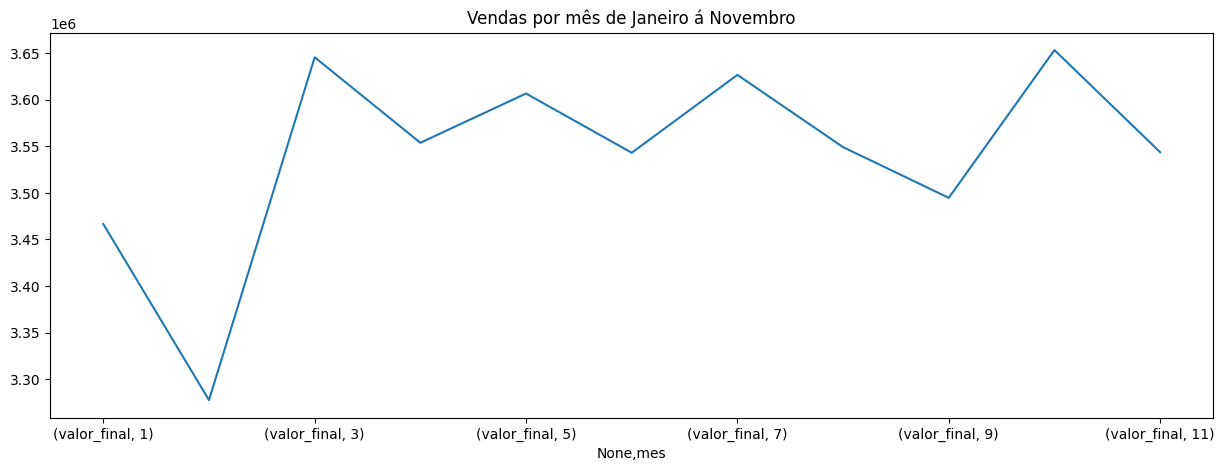

In [170]:
#Vendas por Mês de Janeiro á Novembro
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['valor_final', 'mes']].groupby(['mes']).sum().unstack().plot(ax=ax)
plt.title('Vendas por mês de Janeiro á Novembro')
plt.show()
# graf_dados

# **Machine Learning**

##Preparando o Dataframe de vendas de Dezembro

In [171]:
#colocando as vendas de Dezembro
dfdezembro = pd.read_excel('Vendas - Dez.xlsx')
dfdezembro

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,65014,2019-12-01,Shopping Morumbi,Sunga Listrado,5,114,570
1,65014,2019-12-01,Shopping Morumbi,Casaco Listrado,1,269,269
2,65016,2019-12-01,Iguatemi Campinas,Sapato Listrado,2,363,726
3,65016,2019-12-01,Iguatemi Campinas,Casaco,1,250,250
4,65017,2019-12-01,Shopping SP Market,Gorro Liso,3,92,276
...,...,...,...,...,...,...,...
7084,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
7085,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
7086,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
7087,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


In [172]:
#Verificando numeros nulos
dfdezembro.isnull().sum()

Código Venda      0
Data              0
ID Loja           0
Produto           0
Quantidade        0
Valor Unitário    0
Valor Final       0
dtype: int64

In [173]:
#Renomeando as colunas
dfdezembro=dfdezembro.rename(columns={'Código Venda':'codigo_venda'})
dfdezembro=dfdezembro.rename(columns={'Data':'data'})
dfdezembro=dfdezembro.rename(columns={'ID Loja':'id_loja'})
dfdezembro=dfdezembro.rename(columns={'Produto':'produto'})
dfdezembro=dfdezembro.rename(columns={'Quantidade':'quantidade'})
dfdezembro=dfdezembro.rename(columns={'Valor Unitário':'valor_unitario'})
dfdezembro=dfdezembro.rename(columns={'Valor Final':'valor_final'})
dfdezembro

,codigo_venda,data,id_loja,produto,quantidade,valor_unitario,valor_final
0,65014,2019-12-01,Shopping Morumbi,Sunga Listrado,5,114,570
1,65014,2019-12-01,Shopping Morumbi,Casaco Listrado,1,269,269
2,65016,2019-12-01,Iguatemi Campinas,Sapato Listrado,2,363,726
3,65016,2019-12-01,Iguatemi Campinas,Casaco,1,250,250
4,65017,2019-12-01,Shopping SP Market,Gorro Liso,3,92,276
...,...,...,...,...,...,...,...
7084,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
7085,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
7086,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
7087,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


In [174]:
#criando uma nova coluna contendo o mês da venda
dfdezembro['mes'] = pd.DatetimeIndex(dfdezembro.data).month
dfdezembro

,codigo_venda,data,id_loja,produto,quantidade,valor_unitario,valor_final,mes
0,65014,2019-12-01,Shopping Morumbi,Sunga Listrado,5,114,570,12
1,65014,2019-12-01,Shopping Morumbi,Casaco Listrado,1,269,269,12
2,65016,2019-12-01,Iguatemi Campinas,Sapato Listrado,2,363,726,12
3,65016,2019-12-01,Iguatemi Campinas,Casaco,1,250,250,12
4,65017,2019-12-01,Shopping SP Market,Gorro Liso,3,92,276,12
...,...,...,...,...,...,...,...,...
7084,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204,12
7085,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080,12
7086,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87,12
7087,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108,12


In [175]:
#Juntando os dois Dataframes
df = pd.concat([df, dfdezembro], ignore_index=True)

##Alvo

In [176]:
#definindo as colunas que vão ser usadas no machine learning
dfml = df[['id_loja', 'produto', 'mes', 'valor_final',]]
dfml = dfml.replace([' ', '-'], '_', regex=True)
dfml

,id_loja,produto,mes,valor_final
0,Iguatemi_Esplanada,Sapato_Estampa,1,358
1,Iguatemi_Esplanada,Camiseta,1,360
2,Iguatemi_Esplanada,Sapato_Xadrez,1,368
3,Norte_Shopping,Relógio,1,600
4,Norte_Shopping,Chinelo_Liso,1,71
...,...,...,...,...
100994,Center_Shopping_Uberlândia,Short_Listrado,12,204
100995,Center_Shopping_Uberlândia,Mochila,12,1080
100996,Center_Shopping_Uberlândia,Pulseira_Estampa,12,87
100997,Ribeirão_Shopping,Camisa_Listrado,12,108


In [177]:
dfml.isnull().sum()

id_loja        0
produto        0
mes            0
valor_final    0
dtype: int64

##Normalização

In [178]:
dfml['valor_final'] = dfml['valor_final']/dfml['valor_final'].max()
dfml

,id_loja,produto,mes,valor_final
0,Iguatemi_Esplanada,Sapato_Estampa,1,0.095467
1,Iguatemi_Esplanada,Camiseta,1,0.096000
2,Iguatemi_Esplanada,Sapato_Xadrez,1,0.098133
3,Norte_Shopping,Relógio,1,0.160000
4,Norte_Shopping,Chinelo_Liso,1,0.018933
...,...,...,...,...
100994,Center_Shopping_Uberlândia,Short_Listrado,12,0.054400
100995,Center_Shopping_Uberlândia,Mochila,12,0.288000
100996,Center_Shopping_Uberlândia,Pulseira_Estampa,12,0.023200
100997,Ribeirão_Shopping,Camisa_Listrado,12,0.028800


##Dados categóricos

In [179]:
col_cat = ['id_loja','produto']

dfml_dummies = pd.get_dummies(dfml[col_cat].astype(str), drop_first=False)
dfml_dummies

,id_loja_Bourbon_Shopping_SP,id_loja_Center_Shopping_Uberlândia,id_loja_Iguatemi_Campinas,id_loja_Iguatemi_Esplanada,id_loja_Norte_Shopping,id_loja_Novo_Shopping_Ribeirão_Preto,id_loja_Palladium_Shopping_Curitiba,id_loja_Parque_Dom_Pedro_Shopping,id_loja_Passei_das_Águas_Shopping,id_loja_Ribeirão_Shopping,...,produto_Terno_Linho,produto_Terno_Liso,produto_Terno_Listrado,produto_Terno_Xadrez,produto_Tênis,produto_Tênis_Estampa,produto_Tênis_Linho,produto_Tênis_Liso,produto_Tênis_Listrado,produto_Tênis_Xadrez
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100994,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100997,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [180]:
dfml = pd.concat([dfml, dfml_dummies], axis=1)

dfml = dfml.drop(col_cat, axis=1)
dfml

,mes,valor_final,id_loja_Bourbon_Shopping_SP,id_loja_Center_Shopping_Uberlândia,id_loja_Iguatemi_Campinas,id_loja_Iguatemi_Esplanada,id_loja_Norte_Shopping,id_loja_Novo_Shopping_Ribeirão_Preto,id_loja_Palladium_Shopping_Curitiba,id_loja_Parque_Dom_Pedro_Shopping,...,produto_Terno_Linho,produto_Terno_Liso,produto_Terno_Listrado,produto_Terno_Xadrez,produto_Tênis,produto_Tênis_Estampa,produto_Tênis_Linho,produto_Tênis_Liso,produto_Tênis_Listrado,produto_Tênis_Xadrez
0,1,0.095467,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.096000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.098133,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.160000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.018933,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100994,12,0.054400,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100995,12,0.288000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100996,12,0.023200,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100997,12,0.028800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Dados de treinamento e de teste

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

y = dfml.mes
X = dfml.drop(['mes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_new = X.loc[[2997,2998]]
X_new

,valor_final,id_loja_Bourbon_Shopping_SP,id_loja_Center_Shopping_Uberlândia,id_loja_Iguatemi_Campinas,id_loja_Iguatemi_Esplanada,id_loja_Norte_Shopping,id_loja_Novo_Shopping_Ribeirão_Preto,id_loja_Palladium_Shopping_Curitiba,id_loja_Parque_Dom_Pedro_Shopping,id_loja_Passei_das_Águas_Shopping,...,produto_Terno_Linho,produto_Terno_Liso,produto_Terno_Listrado,produto_Terno_Xadrez,produto_Tênis,produto_Tênis_Estampa,produto_Tênis_Linho,produto_Tênis_Liso,produto_Tênis_Listrado,produto_Tênis_Xadrez
2997,0.140000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0.226667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Regressão Logística

In [182]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

all_col_with_plus = ' + '.join(dfml.drop(['mes'], axis=1).columns)

modelo = smf.glm(formula='mes ~ ' + all_col_with_plus, data=dfml,
                family = sm.families.Binomial()).fit()

print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    mes   No. Observations:               100999
Model:                            GLM   Df Residuals:                   100854
Model Family:                Binomial   Df Model:                          144
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Thu, 07 Sep 2023   Deviance:                   4.2324e+07
Time:                        13:20:32   Pearson chi2:                 1.88e+22
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


In [183]:
dfml.loc[dfml.valor_final.isnull()]

,mes,valor_final,id_loja_Bourbon_Shopping_SP,id_loja_Center_Shopping_Uberlândia,id_loja_Iguatemi_Campinas,id_loja_Iguatemi_Esplanada,id_loja_Norte_Shopping,id_loja_Novo_Shopping_Ribeirão_Preto,id_loja_Palladium_Shopping_Curitiba,id_loja_Parque_Dom_Pedro_Shopping,...,produto_Terno_Linho,produto_Terno_Liso,produto_Terno_Listrado,produto_Terno_Xadrez,produto_Tênis,produto_Tênis_Estampa,produto_Tênis_Linho,produto_Tênis_Liso,produto_Tênis_Listrado,produto_Tênis_Xadrez


In [185]:
model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(X_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, modelo.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, modelo.predict(X_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


- Matriz de Confusão
[[171  88 307 187 278 126 278 252 213 366 192  50]
 [199  95 303 172 275 113 293 223 184 290 189  51]
 [197 103 277 184 322 134 308 282 202 305 221  50]
 [208  87 307 199 263 115 299 237 194 353 207  49]
 [174 113 328 194 299 128 316 283 245 374 218  55]
 [203 110 327 187 292 117 289 255 191 315 200  48]
 [201  98 319 204 278 116 334 286 212 371 204  53]
 [181 105 293 206 285 130 344 326 179 325 208  52]
 [175 119 284 206 266 114 319 279 217 313 190  54]
 [195  84 326 189 283 136 302 262 201 330 240  57]
 [182 106 282 201 260 108 339 240 207 331 209  56]
 [142  82 239 169 242  95 246 207 170 265 172  40]]

- Reporte completo
              precision    recall  f1-score   support

           1       0.10      0.08      0.09      8463
           2       0.10      0.05      0.07      7896
           3       0.10      0.14      0.12      8743
           4       0.10      0.09      0.09      8459
           5       0.10      0.13      0.11      8742
           6       0.

#Resumo:
Pelo fato das informações da planilha serem poucas, o sistema de Machine Learning não conseguiu ser muito preciso